# Line Charts
To represent time series information, line charts are usually the quickest to create and easiest to understand. Using the various libraries in Python, quick plotting of data within Python itself without needing a separate visualization tool such as Tableau can help quickly verify and understand the data. Especially for larger datasets, visualizing the datasets in Python can be a more efficient way of quickly digesting the information rather than connecting the dataset to other visualization tools.

In [75]:
# make plots show up in notebook
%matplotlib inline                     

import pandas as pd                    # data package
import matplotlib.pyplot as plt        # pyplot module

In [76]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import datetime as dt 

# FRED Data
Revisiting the historical financial data available through the Federal Reserve Economic Data ([FRED](https://research.stlouisfed.org/fred2/)). Exploring the different charts offered through matplotlib library. 

In [78]:
codes = ['CPIAUCSL']                     # Consumer Price Index for All Urban Consumers: All Items

start = dt.datetime(1998, 6, 1)                 # start date
end = dt.datetime(2018, 6, 1)                   # end date

allcpi = data.DataReader(codes, 'fred', start, end)
allcpi.columns = ['All Items']

#Consumer Price Index for All Urban Consumers: All Items 

print(allcpi.head(3))

            All Items
DATE                 
1998-06-01      162.8
1998-07-01      163.2
1998-08-01      163.4


First, we will explore the various kinds of time series charts offered through matplotlib. From there, we will augment the chart with various parameters to best represent the data. 

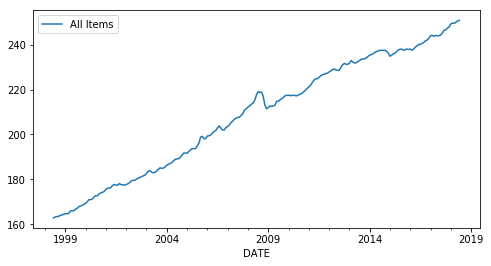

In [79]:
fig, ax = plt.subplots(figsize=(8, 4))

# add things to ax 
allcpi.plot(ax=ax) 

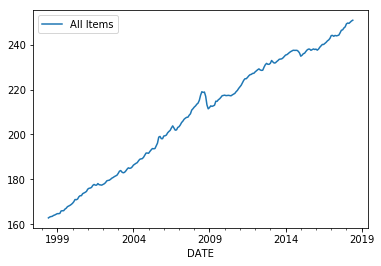

In [80]:
fig, ax = plt.subplots()
# add things to ax 
allcpi.plot(ax=ax, kind='line') 

Text(0,1,'Consumer Price Index for All Urban Consumers: All Items')

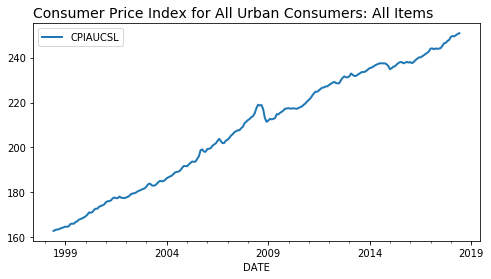

In [81]:
fig, ax = plt.subplots(figsize=(8, 4))

us.plot(ax=ax, lw=2)       
ax.set_title('Consumer Price Index for All Urban Consumers: All Items', fontsize=14, loc='left')

It makes sense the consumer price index trends up over time. However, within the CPI, there are various categories. Inspired by the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/), it may be helpful to compare the CPI increases of various categories. 

In [86]:
# Bring in data for the other categories

codes = ['CPIUFDSL']                     # Consumer Price Index for All Urban Consumers: Food

start = dt.datetime(1998, 6, 1)                 # start date
end = dt.datetime(2018, 6, 1)                   # end date

food = data.DataReader(codes, 'fred', start, end)
#Consumer Price Index for All Urban Consumers: Food 
food.columns=['Food']

print(food.head(3))

             Food
DATE             
1998-06-01  160.2
1998-07-01  160.6
1998-08-01  161.0


In [85]:
codes = ['CUSR0000SAH2']

start = dt.datetime(1998, 6, 1)
end = dt.datetime(2018, 6, 1)

fuel = data.DataReader(codes, 'fred', start, end)
fuel.columns = ['Fuel']
# Consumer Price Index for All Urban Consumers: Fuel

print(fuel.head(3))

             Fuel
DATE             
1998-06-01  128.9
1998-07-01  128.7
1998-08-01  128.4


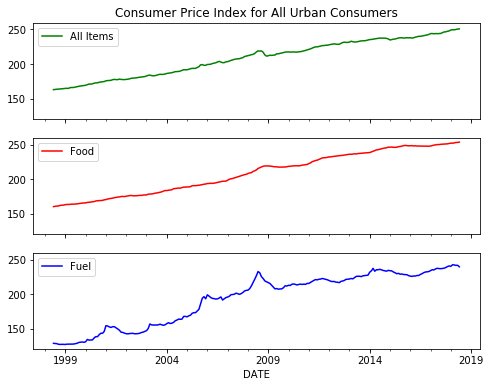

In [87]:
# Visualizing the three datasets separately

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 6))

allcpi.plot(ax=ax[0], color='green', title='Consumer Price Index for All Urban Consumers', label='All Items')   # first plot
food.plot(ax=ax[1], color='red', label='Food')     # second plot
fuel.plot(ax=ax[2], color='blue', label='Fuel & Utilities')    # third plot
#plt.legend([a, f, fu], ['All CPI', 'Food', 'Fuel & Utilities'])


# References

U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items [CPIAUCSL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL, July 21, 2018. <br><br>
U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: Food [CPIUFDSL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIUFDSL, July 22, 2018. <br><br>
U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: Fuels and utilities [CUSR0000SAH2], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CUSR0000SAH2, July 22, 2018.
